### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('SVM.csv')

# Display basic information
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64


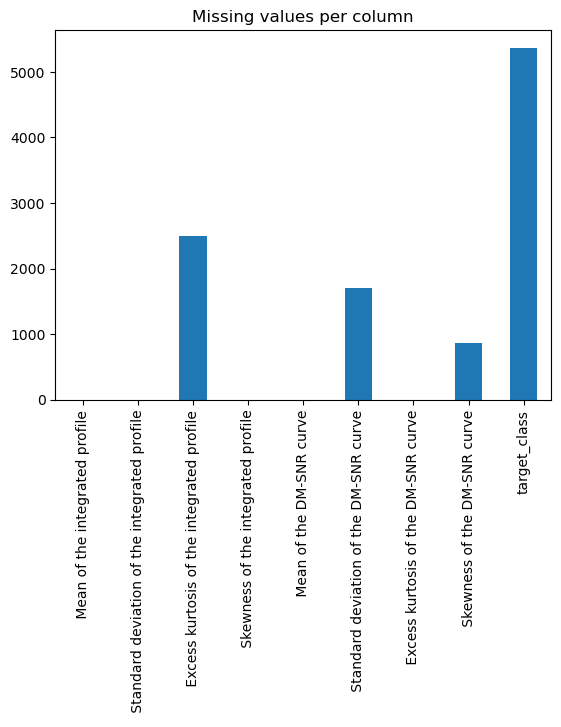

In [3]:
# Check missing values per column
missing_values = df.isnull().sum()
print(missing_values)

# Plot missing values
missing_values.plot(kind='bar', title='Missing values per column')
plt.show()

In [4]:
# Drop rows where target_class is missing
df = df.dropna(subset=['target_class'])

# Impute missing feature values with column mean
df.fillna(df.mean(), inplace=True)

# Verify no missing values left
print(df.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


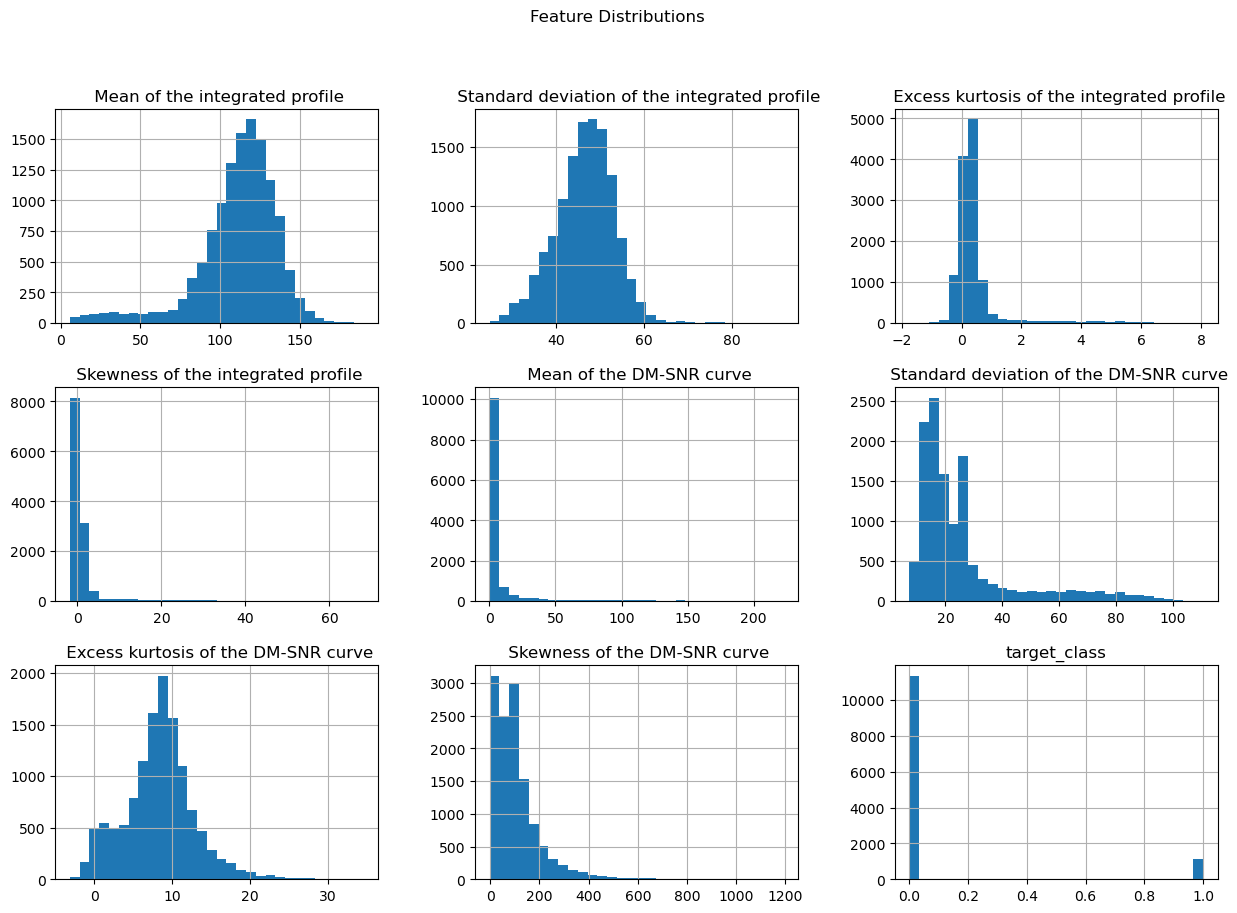

In [5]:
# Plot histograms for all features
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.show()

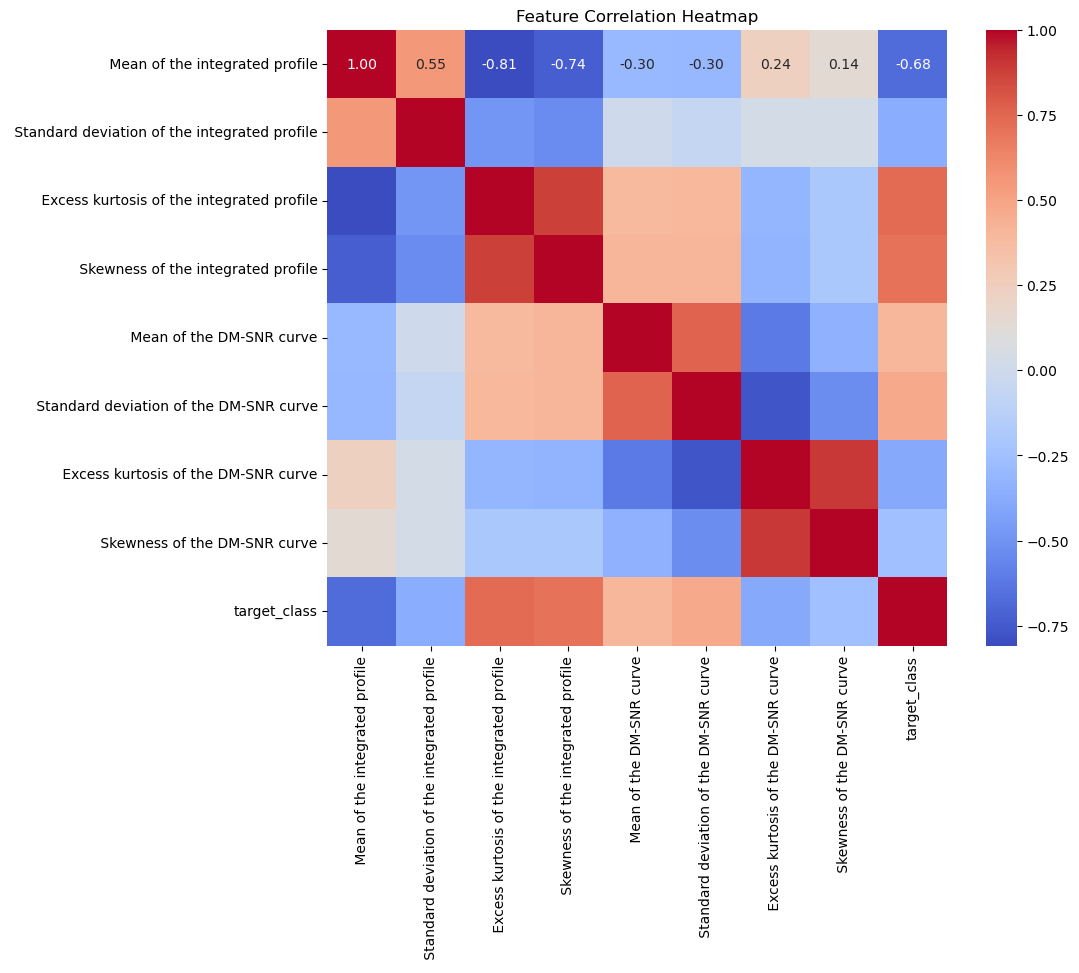

In [6]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# Summary statistics
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666010,4.535783,104.686104,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


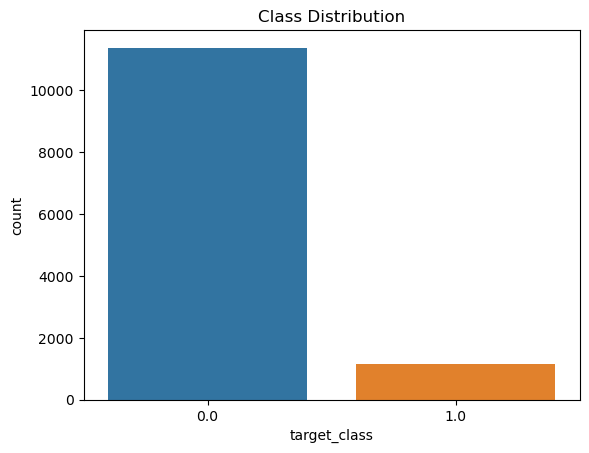

target_class
0.0    90.796616
1.0     9.203384
Name: proportion, dtype: float64


In [8]:
# Check class balance
sns.countplot(x='target_class', data=df)
plt.title('Class Distribution')
plt.show()

# Print class distribution
print(df['target_class'].value_counts(normalize=True) * 100)

In [9]:
# Separate features and target
X = df.drop('target_class', axis=1)
y = df['target_class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Build the model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2266    9]
 [  40  191]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2275
         1.0       0.95      0.83      0.89       231

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506


Accuracy: 0.9804469273743017


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Faster parameter space
param_distributions = {
    'C': uniform(0.1, 10),          
    'gamma': uniform(0.001, 0.1),    
    'kernel': ['rbf', 'poly', 'sigmoid']               
}

# Setup Fast RandomizedSearchCV
random_search_fast = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,         
    cv=3,               
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_fast.fit(X_train_scaled, y_train)

# Best hyperparameters found
print("Best Hyperparameters (Fast Search):", random_search_fast.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters (Fast Search): {'C': 6.274815096277165, 'gamma': 0.06216531604882809, 'kernel': 'rbf'}


In [27]:
# Predict using the best model
best_svm_fast = random_search_fast.best_estimator_
y_pred_best_fast = best_svm_fast.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix (After Fast Tuning):")
print(confusion_matrix(y_test, y_pred_best_fast))

print("\nClassification Report (After Fast Tuning):")
print(classification_report(y_test, y_pred_best_fast))

print("\nAccuracy (After Fast Tuning):", accuracy_score(y_test, y_pred_best_fast))

Confusion Matrix (After Fast Tuning):
[[2266    9]
 [  38  193]]

Classification Report (After Fast Tuning):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2275
         1.0       0.96      0.84      0.89       231

    accuracy                           0.98      2506
   macro avg       0.97      0.92      0.94      2506
weighted avg       0.98      0.98      0.98      2506


Accuracy (After Fast Tuning): 0.981245011971269


In [24]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Small and smart parameter grid
param_grid = {
    'C': [0.1, 1, 10],          
    'gamma': [0.001, 0.01, 0.1], 
    'kernel': ['rbf', 'poly', 'sigmoid']           
}

# Setup Fast GridSearchCV
grid_search_fast = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,           # 3-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search_fast.fit(X_train_scaled, y_train)

# Best hyperparameters found
print("Best Hyperparameters (Fast Grid Search):", grid_search_fast.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters (Fast Grid Search): {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [25]:
# Predict using the best model
best_svm_grid_fast = grid_search_fast.best_estimator_
y_pred_grid_fast = best_svm_grid_fast.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix (After Fast Grid Search Tuning):")
print(confusion_matrix(y_test, y_pred_grid_fast))

print("\nClassification Report (After Fast Grid Search Tuning):")
print(classification_report(y_test, y_pred_grid_fast))

print("\nAccuracy (After Fast Grid Search Tuning):", accuracy_score(y_test, y_pred_grid_fast))

Confusion Matrix (After Fast Grid Search Tuning):
[[2266    9]
 [  40  191]]

Classification Report (After Fast Grid Search Tuning):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2275
         1.0       0.95      0.83      0.89       231

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506


Accuracy (After Fast Grid Search Tuning): 0.9804469273743017
